In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
data_coverage = pd.read_csv('data/Broadband/BroadbandCleaned/broadband_filtered_coverage_all.csv')
data_county = pd.read_csv('data/HousingPrice/HousingPriceCleaned/profiled_data.csv')
data_yorkshire =  data_county[data_county['County'].str.contains('Yorkshire', case=False)]
data_oxfordshire = data_county[data_county['County'].str.contains('Oxfordshire', case=False)]

In [25]:
matching_postcodes = data_yorkshire['Post Code'].tolist()
filtered_data_coverage_yk = data_coverage[data_coverage['postcode_space'].isin(matching_postcodes)]

filtered_data_coverage_yk = filtered_data_coverage_yk.merge(data_yorkshire, left_on='postcode_space', right_on='Post Code', how='inner')
filtered_data_coverage_yk.head(5)

matching_postcodes = data_oxfordshire['Post Code'].tolist()

filtered_data_coverage_ox = data_coverage[data_coverage['postcode_space'].isin(matching_postcodes)]
filtered_data_coverage_ox = filtered_data_coverage_ox.merge(data_oxfordshire, left_on='postcode_space', right_on='Post Code', how='inner')
filtered_data_coverage_ox.head(5)


,postcode_space,SFBB availability (% premises),UFBB availability (% premises),Price,Post Code,City,District,County
0,OX10 0AD,100.0,100.0,1300000,OX10 0AD,WALLINGFORD,SOUTH OXFORDSHIRE,OXFORDSHIRE
1,OX10 0AF,100.0,100.0,225000,OX10 0AF,WALLINGFORD,SOUTH OXFORDSHIRE,OXFORDSHIRE
2,OX10 0AL,100.0,85.7,160000,OX10 0AL,WALLINGFORD,SOUTH OXFORDSHIRE,OXFORDSHIRE
3,OX10 0AX,100.0,100.0,375000,OX10 0AX,WALLINGFORD,SOUTH OXFORDSHIRE,OXFORDSHIRE
4,OX10 0BN,100.0,71.4,810000,OX10 0BN,WALLINGFORD,SOUTH OXFORDSHIRE,OXFORDSHIRE


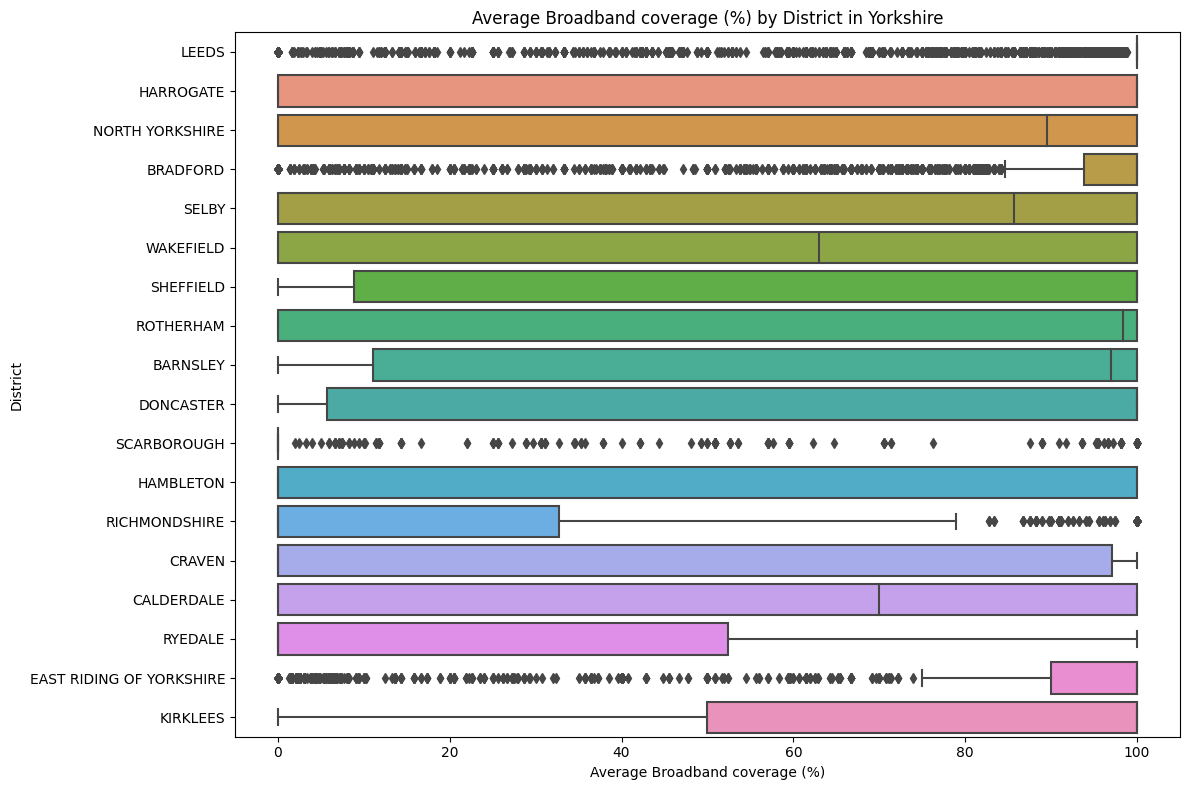

In [26]:
def remove_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series.loc[(series >= lower_bound) & (series <= upper_bound)]

filtered_data_coverage_yk['UFBB availability (% premises)'] = remove_outliers(filtered_data_coverage_yk['UFBB availability (% premises)'])

plt.figure(figsize=(12, 8))
sns.boxplot(data=filtered_data_coverage_yk, y='District', x='UFBB availability (% premises)', orient='h')
plt.xlabel('Average Broadband coverage (%)')
plt.ylabel('District')
plt.title('Average Broadband coverage (%) by District in Yorkshire')
plt.tight_layout()
plt.show()

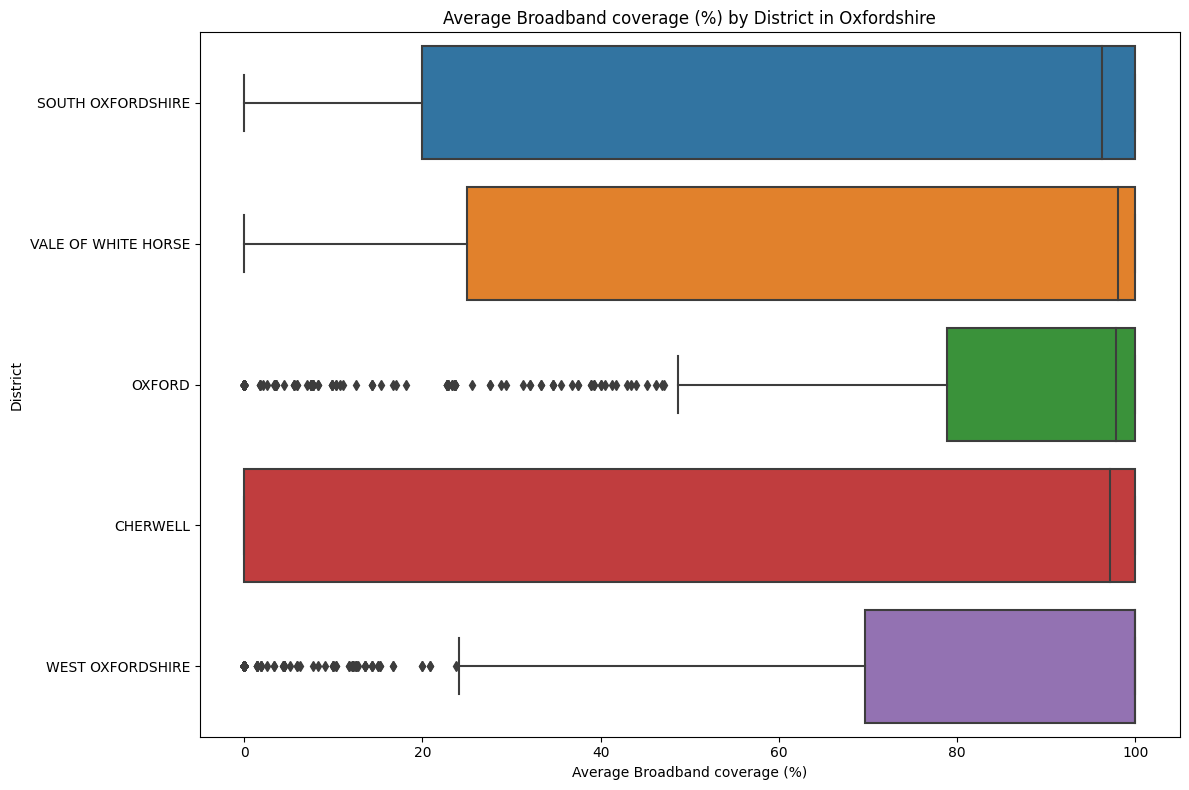

In [27]:
def remove_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series.loc[(series >= lower_bound) & (series <= upper_bound)]

filtered_data_coverage_ox['UFBB availability (% premises)'] = remove_outliers(filtered_data_coverage_ox['UFBB availability (% premises)'])

plt.figure(figsize=(12, 8))
sns.boxplot(data=filtered_data_coverage_ox, y='District', x='UFBB availability (% premises)', orient='h')
plt.xlabel('Average Broadband coverage (%)')
plt.ylabel('District')
plt.title('Average Broadband coverage (%) by District in Oxfordshire')
plt.tight_layout()
plt.show()

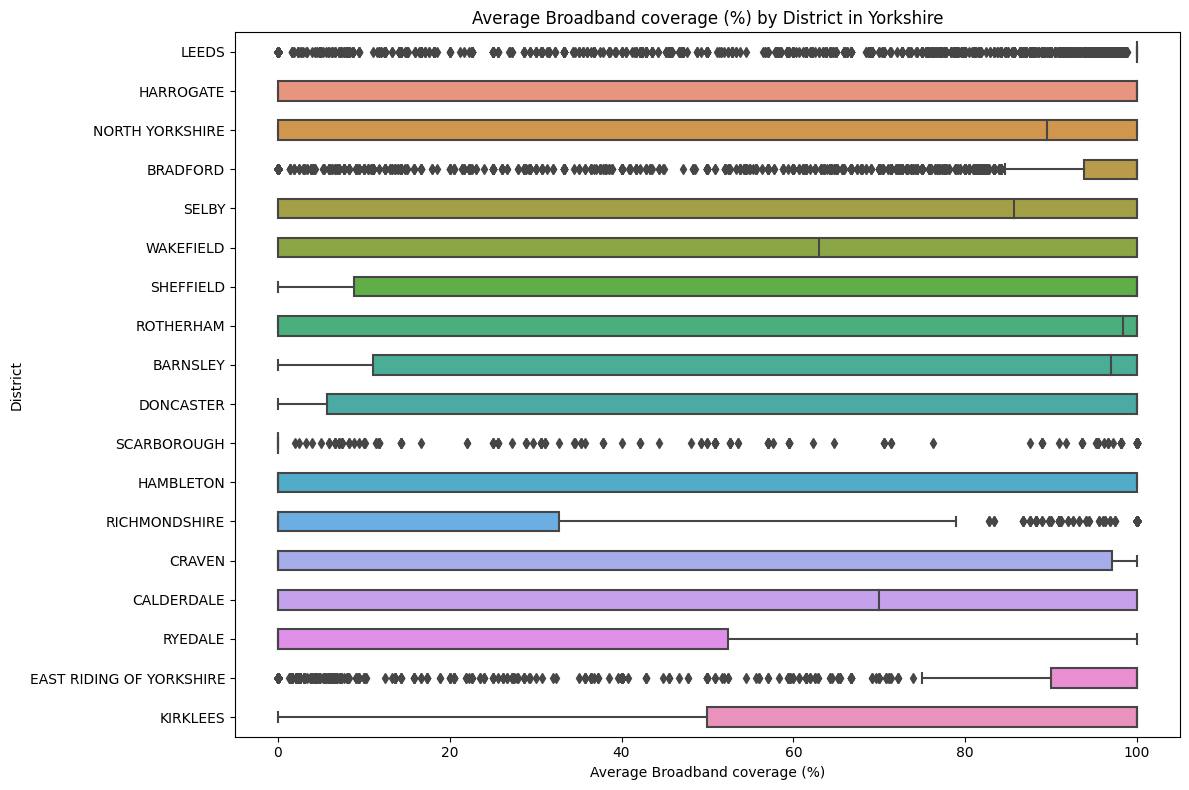

In [28]:
def remove_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series.loc[(series >= lower_bound) & (series <= upper_bound)]

filtered_data_coverage_yk['SFBB availability (% premises)'] = remove_outliers(filtered_data_coverage_yk['SFBB availability (% premises)'])

plt.figure(figsize=(12, 8))
sns.boxplot(data=filtered_data_coverage_yk, y='District', x='UFBB availability (% premises)',width=0.5, orient='h')
plt.xlabel('Average Broadband coverage (%)')
plt.ylabel('District')
plt.title('Average Broadband coverage (%) by District in Yorkshire')
plt.tight_layout()
plt.show()

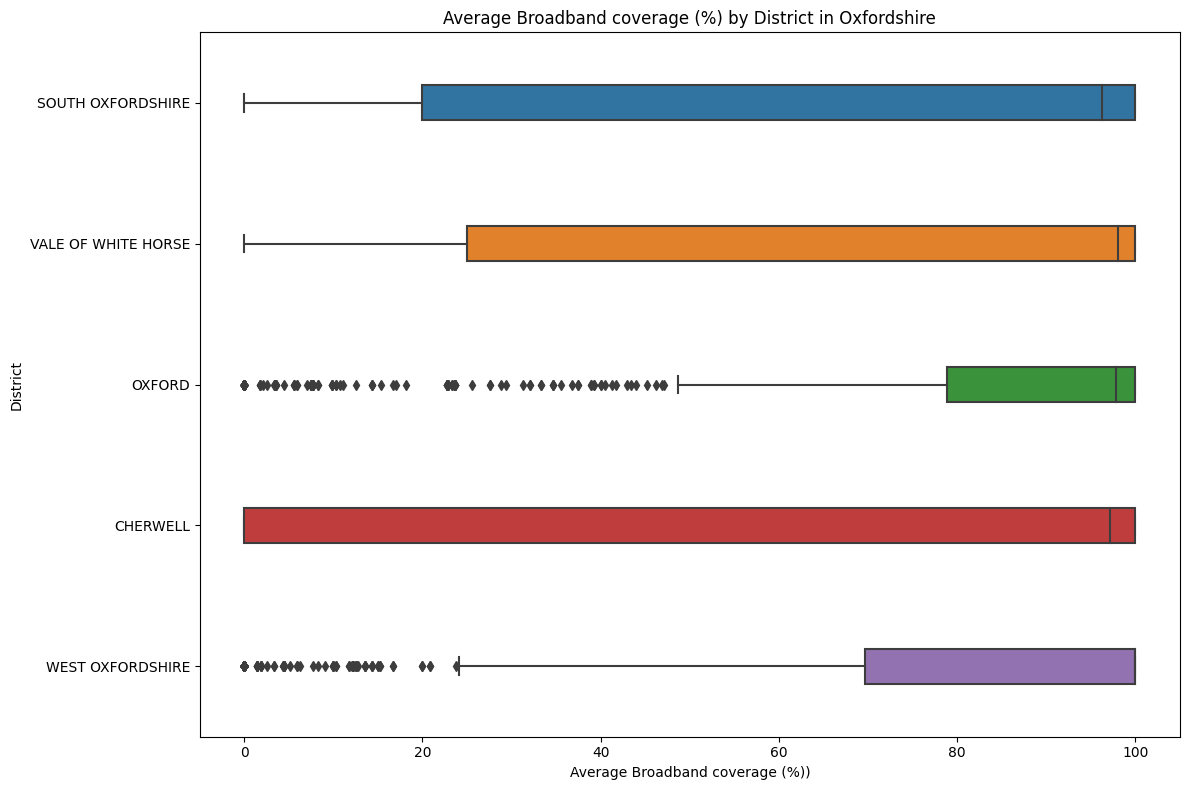

In [29]:
def remove_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series.loc[(series >= lower_bound) & (series <= upper_bound)]

filtered_data_coverage_ox['SFBB availability (% premises)'] = remove_outliers(filtered_data_coverage_ox['UFBB availability (% premises)'])

plt.figure(figsize=(12, 8))
sns.boxplot(data=filtered_data_coverage_ox, y='District', x='UFBB availability (% premises)',width=0.25, orient='h')
plt.xlabel('Average Broadband coverage (%))')
plt.ylabel('District')
plt.title('Average Broadband coverage (%) by District in Oxfordshire')
plt.tight_layout()
plt.show()

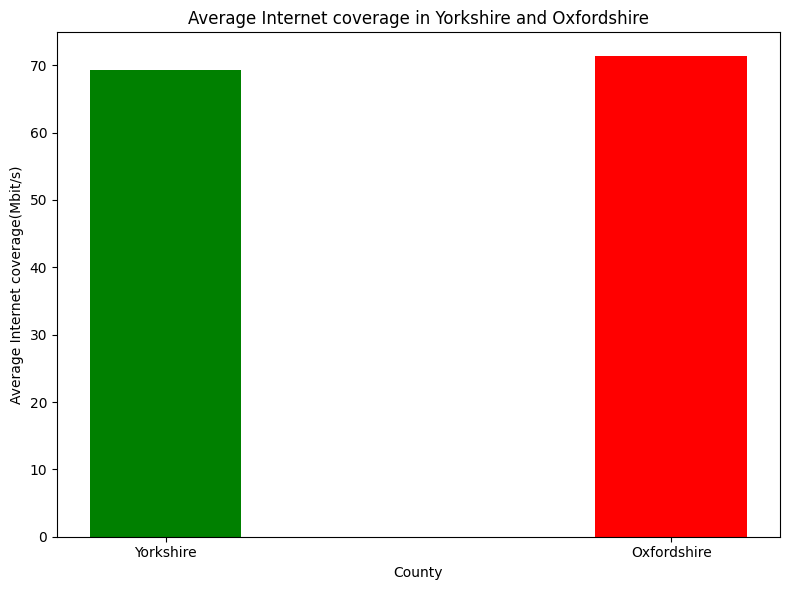

In [30]:
average_coverage_yorkshire = filtered_data_coverage_yk['UFBB availability (% premises)'].mean()
average_coverage_oxfordshire = filtered_data_coverage_ox['UFBB availability (% premises)'].mean()
counties = ['Yorkshire', 'Oxfordshire']
average_coverage = [average_coverage_yorkshire, average_coverage_oxfordshire]

bar_width = 0.3
x_positions = [0, 1]

plt.figure(figsize=(8, 6))
plt.bar(x_positions, average_coverage, color=['green', 'red'], width=bar_width, align='center')
plt.xlabel('County')
plt.ylabel('Average Internet coverage(Mbit/s)')
plt.title('Average Internet coverage in Yorkshire and Oxfordshire')
plt.xticks(x_positions, counties)

plt.tight_layout()
plt.show()

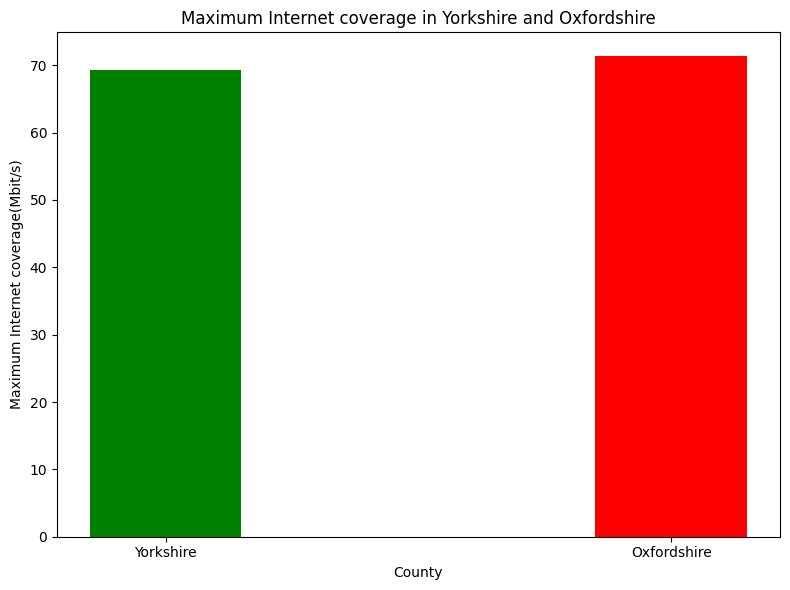

In [31]:
average_coverage_yorkshire = filtered_data_coverage_yk['UFBB availability (% premises)'].mean()
average_coverage_oxfordshire = filtered_data_coverage_ox['UFBB availability (% premises)'].mean()
counties = ['Yorkshire', 'Oxfordshire']
average_coverage = [average_coverage_yorkshire, average_coverage_oxfordshire]

bar_width = 0.3
x_positions = [0, 1]

plt.figure(figsize=(8, 6))
plt.bar(x_positions, average_coverage, color=['green', 'red'], width=bar_width, align='center')
plt.xlabel('County')
plt.ylabel('Maximum Internet coverage(Mbit/s)')
plt.title('Maximum Internet coverage in Yorkshire and Oxfordshire')
plt.xticks(x_positions, counties)

plt.tight_layout()
plt.show()